In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('tobe.xlsx')

df

,Pressure (KPA),Temp (Celcius),Saturated Liquid (m^3/kg),Saturated Vapor (m^3/kg),Sat. Liquid (kJ/(kg*K),Sat. Vap ((kJ/(kg*K)
0,0.04,28.96,0.001004,34.800000,0.4226,8.4746
1,0.06,36.16,0.001006,23.739000,0.5210,8.3304
2,0.08,41.51,0.001008,18.103000,0.5926,8.2287
3,0.10,45.81,0.001010,14.674000,0.6493,8.1502
4,0.20,60.06,0.001017,7.649000,0.8320,7.9085
5,0.30,69.10,0.001022,5.229000,0.9439,7.7686
6,0.40,75.87,0.001027,3.993000,1.0259,7.6700
7,0.50,81.33,0.001030,3.240000,1.0910,7.5939
8,0.60,85.94,0.001033,2.732000,1.1453,7.5320
9,0.70,89.95,0.001036,2.365000,1.1919,7.4797


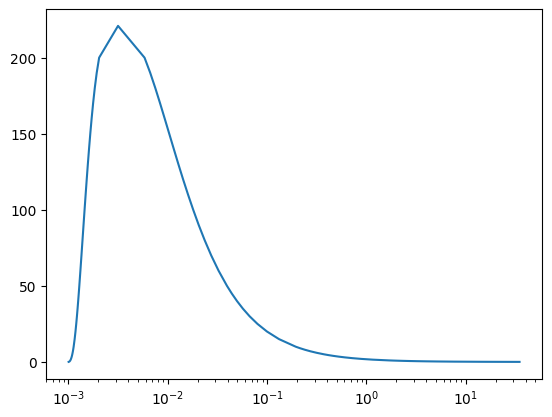

In [2]:
pressure = df['Pressure (KPA)']
satliq = df['Saturated Liquid (m^3/kg)']
satvap = df['Saturated Vapor (m^3/kg)']
tempa = df['Temp (Celcius)']
entliq = df['Sat. Liquid (kJ/(kg*K)']
entvap = df['Sat. Vap ((kJ/(kg*K)']

yaxis = pd.concat([pressure, pressure.iloc[::-1]], ignore_index = True)
xaxis = pd.concat([satliq, satvap.iloc[::-1]], ignore_index = True)


plt.figure()
plt.xscale('log')
plt.plot(xaxis, yaxis, label = 'Saturation dome')
plt.show()





In [3]:
def pres_extrap(temp):
    for dex, i in enumerate(tempa):
        if temp == i:
            return pressure[dex]
        if temp >= tempa[dex] and temp <= tempa[dex + 1]:
            x = (((pressure[dex+1]-pressure[dex])/(tempa[dex+1]-tempa[dex]))*(temp-tempa[dex]))+pressure[dex]
            return x
        
def satliq_extrap(temp):
    for dex, i in enumerate(tempa):
        if temp == i:
            return satliq[dex]
        if temp >= tempa[dex] and temp <= tempa[dex + 1]:
            x = (((satliq[dex+1]-satliq[dex])/(tempa[dex+1]-tempa[dex]))*(temp-tempa[dex]))+satliq[dex]
            return x
    
def satvap_extrap(temp):
    for dex, i in enumerate(tempa):
        if temp == i:
            return satvap[dex]
        if temp >= tempa[dex] and temp <= tempa[dex + 1]:
            x = (((satvap[dex+1]-satvap[dex])/(tempa[dex+1]-tempa[dex]))*(temp-tempa[dex]))+satvap[dex]
            return x

def entvap_extrap(temp):
    for dex, i in enumerate(tempa):
        if temp == i:
            return entvap[dex]
        if temp >= tempa[dex] and temp <= tempa[dex + 1]:
            x = (((entvap[dex+1]-entvap[dex])/(tempa[dex+1]-tempa[dex]))*(temp-tempa[dex]))+entvap[dex]
            return x

def entliq_extrap(temp):
    for dex, i in enumerate(tempa):
        if temp == i:
            return entliq[dex]
        if temp >= tempa[dex] and temp <= tempa[dex + 1]:
            x = (((entliq[dex+1]-entliq[dex])/(tempa[dex+1]-tempa[dex]))*(temp-tempa[dex]))+entliq[dex]
            return x





In [4]:
temp = 100
ltemp = 60

def caref(coltemp, hotemp):
    return 1 - (coltemp/hotemp)

def isothermal_addition(temp):
    press = pres_extrap(temp)
    initv = satliq_extrap(temp)
    finv = satvap_extrap(temp)
    inits = entliq_extrap(temp)
    fins = entvap_extrap(temp)
    return press, initv, finv, inits, fins

def adiabatic_expansion(temp, ltemp):
    initP, initv, _, inits, fins = isothermal_addition(temp)
    liquid_entropy = entliq_extrap(ltemp)
    vapour_entropy = entvap_extrap(ltemp)
    x = (fins - liquid_entropy)/(vapour_entropy-liquid_entropy)
    new_spvolume = (x*(satvap_extrap(ltemp)-satliq_extrap(ltemp)))+satliq_extrap(ltemp)
    final_press = pres_extrap(ltemp)
    return liquid_entropy, vapour_entropy, x, new_spvolume, final_press, inits

def isothermal_rejection(temp,ltemp):
    liquid_entropy, vapour_entropy, _, _, press, inits = adiabatic_expansion(temp, ltemp)
    new_x = (inits - liquid_entropy)/(vapour_entropy-liquid_entropy)
    final_spvolume = (new_x*(satvap_extrap(ltemp)-satliq_extrap(ltemp)))+satliq_extrap(ltemp)
    return new_x, final_spvolume, inits, press

carof = caref(ltemp, temp)
initpres, initvol, finvol, initent, finent = isothermal_addition(temp)
_, _, qual, qual_phase, fin_press, _ = adiabatic_expansion(temp, ltemp)
new_qual, new_phase, _, _ = isothermal_rejection(temp, ltemp)

print(f'Your input temperatures {temp} and {ltemp} \n \t During Stage 1, \n \t initial Pressure:{initpres}, \n \t initial specific volume:{initvol},\n\t initial specific entropy {initent}')
print(f'At stage 2,\n \t the pressure is same, \n \t the specific volume = {finvol}, \n \t the specific entropy = {finent}')
print(f'At Stage 3, \n \t the pressure is {fin_press}, \n \t liquid quality is {qual}, \n \t the specific volume is {qual_phase}, \n \t the specific entropy is the same')
print(f'At stage 4, pressure is same, \n \t the entropy is same as initial, \n \t the final specifc volume is {new_phase}, \n \t the new quality is {new_qual}')

Your input temperatures 100 and 60 
 	 During Stage 1, 
 	 initial Pressure:1.0157179269328804, 
 	 initial specific volume:0.0010435017841971114,
	 initial specific entropy 1.3067180968564147
At stage 2,
 	 the pressure is same, 
 	 the specific volume = 1.6771818181818179, 
 	 the specific entropy = 7.35512158028887
At Stage 3, 
 	 the pressure is 0.19957894736842105, 
 	 liquid quality is 0.9216765146646434, 
 	 the specific volume is 7.077245550128635, 
 	 the specific entropy is the same
At stage 4, pressure is same, 
 	 the entropy is same as initial, 
 	 the final specifc volume is 0.5167611079735882, 
 	 the new quality is 0.06717548519152464


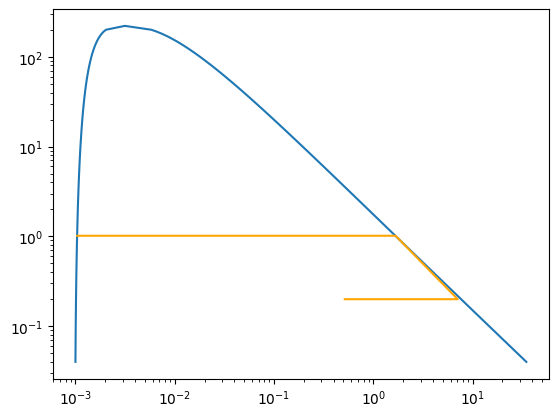

In [5]:
x_axis = [initvol, finvol, qual_phase, new_phase]
y_axis = [initpres, initpres, fin_press, fin_press]

plt.figure()
plt.plot(xaxis, yaxis, label = 'Saturation dome')
plt.plot(x_axis, y_axis, label = 'Carnot Cycle', color = 'orange')
plt.xscale('log')
plt.yscale('log')
plt.show()


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

print(f'Initial value {initvol} and final value {finvol}')

volrang1 = np.linspace(initvol, finvol, 10)
volrang2 = np.linspace(finvol, qual_phase, 10)
volrang3 = np.linspace(qual_phase, new_phase, 10)
volrang4 = np.linspace(new_phase, initvol, 10)

pressrang1 = [initpres] * 10
pressrang2 = np.linspace(initpres,fin_press,10)
pressrang3 = [fin_press] * 10
pressrang4 = np.linspace(fin_press, initpres, 10)

x = [item for sublist in [volrang1,volrang2,volrang3,volrang4] for item in sublist]
y = [item for sublist in [pressrang1, pressrang2,pressrang3, pressrang4] for item in sublist]

x_show = []
y_show = []

# Assuming you have your x and y data points as lists
x_data, y_data = [], []
all_x_points = [...]  # Your 40 x points here
all_y_points = [...]  # Your 40 y points here

# Initial setup for your plot
plt.plot(xaxis, yaxis, label='Initial Plot')  # Replace with your initial plot data
line, = plt.plot([], [], label='Animated Plot', color='orange')  # Line to be animated

# Update function for FuncAnimation
def update(frame):
    plt.xscale('log')
    plt.yscale('log')
    x_show.append(x[frame])
    y_show.append(y[frame])
    line.set_data(x, y)
    return line,

# Create animation
ani = FuncAnimation(plt.gcf(), update, frames=range(len(x)), blit=True)

plt.legend()
plt.show()


Initial value 0.0010435017841971114 and final value 1.6771818181818179


<IPython.core.display.Javascript object>

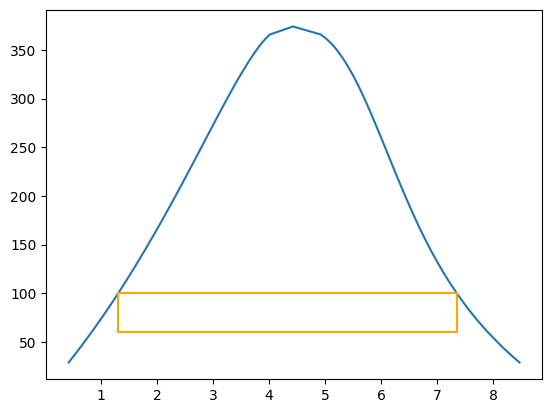

In [9]:
yaxis = pd.concat([tempa, tempa.iloc[::-1]], ignore_index = True)
xaxis = pd.concat([entliq, entvap.iloc[::-1]], ignore_index = True)

x_axis = [initent, finent, finent, initent, initent]
y_axis = [temp, temp, ltemp, ltemp, temp]

plt.figure()
plt.plot(xaxis, yaxis, label = 'Saturation dome')
plt.plot(x_axis, y_axis, label = 'Carnot Cycle', color = 'orange')
plt.show()



In [14]:
# Ensure you run this in a Jupyter Notebook cell
%matplotlib notebook

In [16]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Creating a figure and axis
fig, ax = plt.subplots()

# Initial data
x = np.linspace(0, 2*np.pi, 128)
line, = ax.plot(x, np.sin(x))

# Update function for the animation
def update(frame):
    line.set_ydata(np.sin(x + frame / 10.0))  # Update the data.
    return line,

# Create an animation
ani = FuncAnimation(fig, update, frames=100, interval=50)

plt.show()

    

<IPython.core.display.Javascript object>

In [2]:
import pygame
import tkinter as tk
import os as os
from pygame.locals import *

def embed_pygame():
    embed = tk.Frame(window, width=500, height=500)  # Size of Pygame window
    embed.grid(columnspan=(600), rowspan=500)  # Adds grid
    embed.pack(side="left")  # Packs window to the left

    os.environ['SDL_WINDOWID'] = str(embed.winfo_id())
    os.environ['SDL_VIDEODRIVER'] = 'windib'

    pygame.display.init()
    screen = pygame.display.set_mode((500, 500))
    pygame.display.flip()

    while True:
        # Pygame loop
        pygame.event.get()
        screen.fill((255, 255, 255))  # Fill the screen with background color.
        pygame.display.update()

        # Tkinter loop
        window.update()

# Tkinter setup
window = tk.Tk()
window.bind('<Escape>', lambda e: window.quit())
embed_pygame()


KeyboardInterrupt: 

In [5]:
import tkinter as tk
import pygame
from pygame.locals import *
import sys as sys

# Function to check if the temperature values are within a valid range
def are_temperatures_valid():
    try:
        boiler_temperature = float(boiler_temp_entry.get())
        cooler_temperature = float(cooler_temp_entry.get())
        # Define your valid temperature range here
        valid_range = (0, 100)  # Example: Valid range is 0°C to 100°C
        
        if valid_range[0] <= boiler_temperature <= valid_range[1] and \
           valid_range[0] <= cooler_temperature <= valid_range[1]:
            return True
        else:
            return False
    except ValueError:
        return False

# Function to close the Tkinter window and open the Pygame interface
def open_pygame_interface():
    if are_temperatures_valid():
        root.destroy()  # Close the Tkinter window
        # Initialize Pygame
        pygame.init()
        
        # Create your Pygame interface and simulation here
        screen = pygame.display.set_mode((800, 600))
        
        running = True
        while running:
            for event in pygame.event.get():
                if event.type == QUIT:
                    pygame.quit()
                    sys.exit()
            # Update your Pygame interface and simulation here
            pygame.display.flip()
          # Quit Pygame when done
    else:
        # Notify the user of invalid input
        error_label.config(text="Invalid temperature values. Please enter valid temperatures.")

# Create the GUI window
root = tk.Tk()
root.title("Temperature Input")

# Boiler Temperature input field
boiler_temp_label = tk.Label(root, text="Boiler Temperature (°C):")
boiler_temp_label.pack()
boiler_temp_entry = tk.Entry(root)
boiler_temp_entry.pack()

# Cooler Temperature input field
cooler_temp_label = tk.Label(root, text="Cooler Temperature (°C):")
cooler_temp_label.pack()
cooler_temp_entry = tk.Entry(root)
cooler_temp_entry.pack()

# Error label for invalid input
error_label = tk.Label(root, text="", fg="red")
error_label.pack()

# Button to submit the input values and proceed to Pygame interface
submit_button = tk.Button(root, text="Submit", command=open_pygame_interface)
submit_button.pack()

# Start the GUI event loop
root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Mahi Alam\AppData\Local\Temp\ipykernel_11948\3321505952.py", line 39, in open_pygame_interface
    pygame.display.flip()
KeyboardInterrupt


In [10]:
import tkinter as tk
import pygame

def runTk():
    root = tk.Tk()
    btn = tk.Label(root, text="Start")
    btn.bind("<Button-1>", lambda x: root.destroy())
    btn.pack()
    root.mainloop()

runTk()

win = pygame.display.set_mode((500, 500))
run = True
while run:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
    win.fill((255, 255, 255))
    pygame.display.update()
pygame.quit()

KeyboardInterrupt: 